**Machine Learning usando PyCaret**

Base de dados foi disponível pelo Ciência dos Dados https://www.youtube.com/c/Ci%C3%AAnciadosDados/featured



![](https://cienciadosdados.com/images/2021/Thumbs/Design_sem_nome_61.png)

![](https://miro.medium.com/max/850/1*tNq0zW90xIQXYmftKmXhuw.png)

#Oficial
https://pycaret.org/create-model/

#Índice

1. O que é PyCaret e por que você deve usá-lo?

2. Como criar nosso modelo de aprendizado de máquina usando 
PyCaret 

3. Construindo modelos de conjunto usando PyCaret

4. Vamos analisar nosso modelo!

5. É hora de fazer novas previsões

6. Salvar e carregar o modelo


**Por que vc deve usá-lo**

- Torna você mais produtivo.
- Você pode gastar menos tempo codificando e pode fazer mais experimentos
- É uma biblioteca de aprendizado de máquina fácil de usar que o ajudará a realizar experimentos completos na construção de Máquinas Preditivas, aprendizado de máquina, seja atribuindo valores ausentes, codificando dados categóricos, engenharia de recursos, ajuste de hiperparâmetros ou criando modelos de conjunto (quer mais? rsrsrs).

##Problema de Negócio

Temos um conjunto de dados bancários com características como idade do cliente, experiência, renda, escolaridade e se ele possui cartão de crédito ou não.

O banco quer construir uma máquina preditiva com aprendizado de máquina que os ajudará a identificar os **clientes em potencial com maior probabilidade de adquirir um empréstimo pessoal.**

**Instalando PyCaret em sua máquina**

In [1]:
!pip install --pre pycaret
!pip install shap #melhor interpretabilidade
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 29.0 MB/s 
     |████████████████████████████████| 9.8 MB 53.0 MB/s 
     |████████████████████████████████| 1.4 MB 71.6 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 281 kB 58.5 MB/s 
     |████████████████████████████████| 106 kB 68.0 MB/s 
     |████████████████████████████████| 11.2 MB 46.1 MB/s 
     |████████████████████████████████| 2.0 MB 47.2 MB/s 
     |████████████████████████████████| 122 kB 51.0 MB/s 
     |████████████████████████████████| 3.3 MB 52.8 MB/s 
     |████████████████████████████████| 69 kB 6.9 MB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 6.8 MB 37.0 MB/s 
     |████████████████████████████████| 79.9 MB 114 kB/s 
     |████████████████████████████████| 930 kB 42.4 MB/s 
     |██████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 34.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc2 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
# importing pandas to read the CSV file
import pandas as pd
# read the data
data_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_train_data.csv')
# view the top rows of the data
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [3]:
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [4]:
# Verificando a Versão do Pycaret
from pycaret.utils import version
version()

'3.0.0.rc2'

**Importando um Módulo:**

 Dependendo do tipo de problema que você vai resolver, primeiro você precisa importar o módulo. Na primeira versão do PyCaret, 6 módulos diferentes estão disponíveis - regressão, classificação, clustering, processamento de linguagem natural (PNL), detecção de anomalias e regra de mineração associada. Neste artigo, vamos resolver um problema de classificação e, portanto, vamos importar o módulo de classificação

**Inicializando a configuração :**

 O PyCaret executa algumas tarefas básicas de pré-processamento, como ignorar os IDs e as colunas de data, imputar os valores ausentes, codificar as variáveis ​​categóricas e dividir o conjunto de dados na divisão de teste e treino para o restante das etapas de modelagem . Quando você executa a função de configuração, ela primeiro confirma os tipos de dados e, em seguida, se você pressionar enter, criará o ambiente para você prosseguir

In [5]:
from pycaret import classification

In [6]:
classification_setup = classification.setup(data= data_classification, target='Personal Loan') #nome do dataframe | e o target é a coluna do dataframe que vamos  usar

,Description,Value
0,Session id,1896
1,Target,Personal Loan
2,Target type,Binary
3,Original data shape,"(4000, 14)"
4,Transformed data shape,"(4000, 14)"
5,Transformed train set shape,"(2799, 14)"
6,Transformed test set shape,"(1201, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


**Treinando um modelo**  

Treinar um modelo no PyCaret é bastante simples. Você só precisa usar a função **create_model** que leva apenas um parâmetro - a abreviação do modelo como uma string. 

Aqui, vamos primeiro treinar um modelo de árvore de decisão para o qual temos que passar **“ dt ”** e ele retornará uma tabela com pontuações de **validação cruzada k-fold** de métricas de avaliação comuns usadas para modelos de classificação.

Aqui está um lembrete rápido das **métricas de avaliação** usadas para aprendizagem supervisionada:

**Classificação**: precisão, AUC, recall, precisão, F1, Kappa
**Regressão**:  MAE, MSE, RMSE, R2, RMSLE, MAPE

In [7]:
# Criando o Modelo (Máquina Preditiva)
#decision tree classification (dt)
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9821,0.9405,0.8889,0.9231,0.9057,0.8958,0.8960
1,0.9786,0.9551,0.9259,0.8621,0.8929,0.8810,0.8817
2,0.9679,0.9491,0.9259,0.7812,0.8475,0.8296,0.8334
3,0.9679,0.9160,0.8519,0.8214,0.8364,0.8185,0.8187
4,0.9750,0.8869,0.7778,0.9545,0.8571,0.8436,0.8489
5,0.9679,0.8499,0.7037,0.9500,0.8085,0.7914,0.8020
6,0.9821,0.9405,0.8889,0.9231,0.9057,0.8958,0.8960
7,0.9714,0.9015,0.8148,0.8800,0.8462,0.8304,0.8312
8,0.9857,0.9756,0.9630,0.8966,0.9286,0.9206,0.9214


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
# Criando Agrupamentos Boosting 
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,0.9200,0.8519,0.8846,0.8679,0.8541,0.8543
1,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180,0.9180
2,0.9750,0.9531,0.9259,0.8333,0.8772,0.8633,0.8648
3,0.9643,0.9141,0.8519,0.7931,0.8214,0.8016,0.8022
4,0.9750,0.8869,0.7778,0.9545,0.8571,0.8436,0.8489
5,0.9679,0.8499,0.7037,0.9500,0.8085,0.7914,0.8020
6,0.9750,0.9365,0.8889,0.8571,0.8727,0.8589,0.8590
7,0.9750,0.9200,0.8519,0.8846,0.8679,0.8541,0.8543
8,0.9893,0.9775,0.9630,0.9286,0.9455,0.9395,0.9397


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [9]:
# OLha o TESOURO: Comparando diversas Máquinas Preditivas
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9839,0.9971,0.8887,0.9456,0.9117,0.9029,0.9061,0.4260
rf,Random Forest Classifier,0.9832,0.9935,0.8554,0.9671,0.9049,0.8958,0.8995,0.5920
lightgbm,Light Gradient Boosting Machine,0.9818,0.9959,0.8628,0.9467,0.8993,0.8894,0.8926,0.1440
et,Extra Trees Classifier,0.9771,0.9934,0.7885,0.9683,0.8667,0.8544,0.8612,0.3190
dt,Decision Tree Classifier,0.9764,0.9290,0.8702,0.8885,0.8754,0.8625,0.8648,0.0500
ada,Ada Boost Classifier,0.9646,0.9729,0.7513,0.8659,0.8015,0.7823,0.7864,0.3280
lda,Linear Discriminant Analysis,0.9396,0.9574,0.6030,0.7159,0.6487,0.6165,0.6223,0.0350
ridge,Ridge Classifier,0.9343,0.0000,0.3494,0.9042,0.4937,0.4675,0.5324,0.0590
lr,Logistic Regression,0.9268,0.9357,0.4647,0.6650,0.5403,0.5027,0.5156,0.1430
qda,Quadratic Discriminant Analysis,0.9225,0.9526,0.6735,0.5861,0.6233,0.5806,0.5844,0.0530


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1896, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

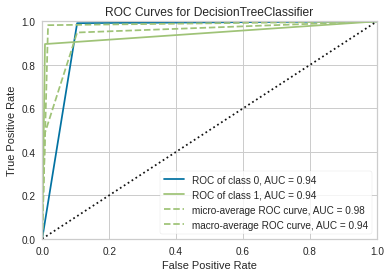

In [10]:
# Gráfico AUC-ROC 
classification.plot_model(classification_dt, plot = 'auc')

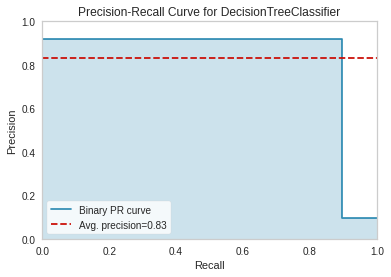

In [11]:
# Curva Precision Recall
classification.plot_model(classification_dt, plot = 'pr')

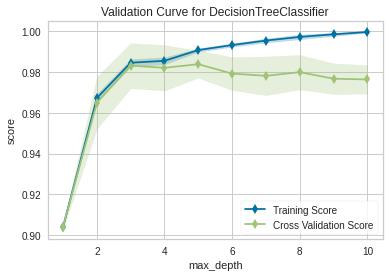

In [12]:
# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

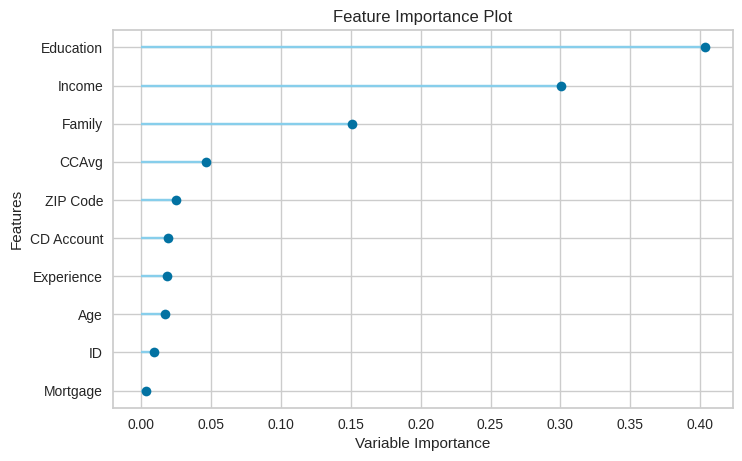

In [13]:
# Importância das Variáveis
classification.plot_model(classification_dt, plot = 'feature')

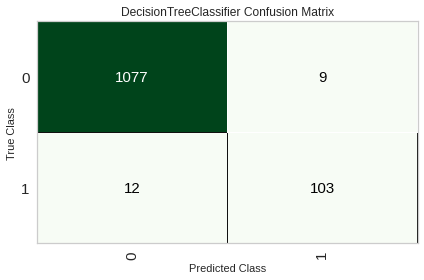

In [14]:
# Confusion Matrix
classification.plot_model(classification_dt, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

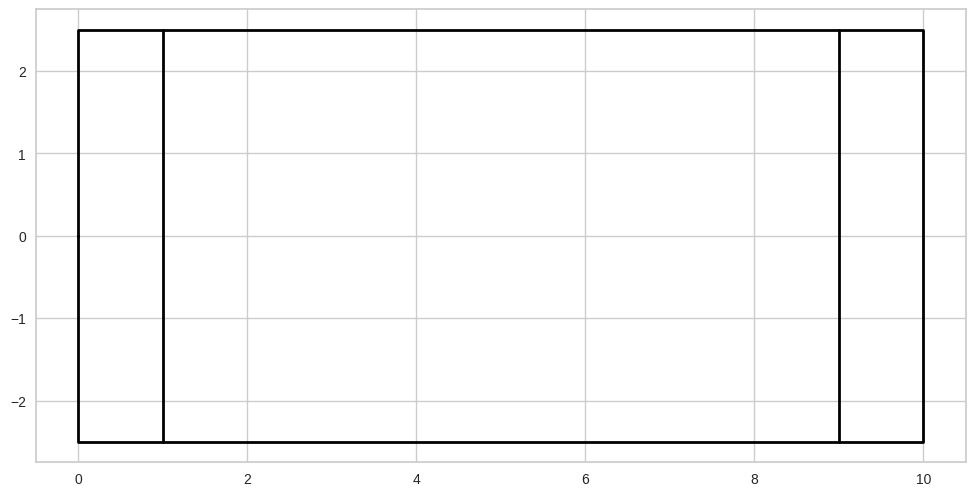

In [15]:
# Avaliação das Máquinas Preditivas
classification.evaluate_model(classification_dt)

## Interpretabilidade dos Modelos (das Máquinas Preditivas)

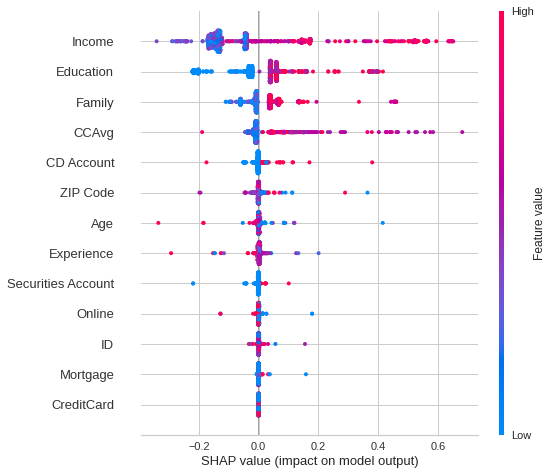

In [16]:
# Usando a Biblioteca SHAP
classification.interpret_model(classification_dt)

## Dados de Teste

In [17]:
# novas previsão com novos dados
test_data_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_test_data.csv')

In [18]:
# Fazendo novas previsões
predictions = classification.predict_model(classification_dt, data=test_data_classification)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9790,0.9372,0.8854,0.8947,0.8901,0.8784,0.8785


In [19]:
# Imprimindo na tela as novas predições
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,Label,Score
0,118.0,58.0,33.0,61.0,92833.0,2.0,2.3,3.0,193.0,0.0,0.0,1.0,0.0,0,0,1.0
1,1817.0,45.0,19.0,91.0,92373.0,2.0,1.7,2.0,0.0,1.0,0.0,1.0,0.0,0,0,1.0
2,671.0,23.0,-1.0,61.0,92374.0,4.0,2.6,1.0,239.0,0.0,0.0,1.0,0.0,0,0,1.0
3,2994.0,65.0,40.0,20.0,92647.0,3.0,0.1,3.0,0.0,0.0,0.0,0.0,1.0,0,0,1.0
4,3265.0,67.0,41.0,114.0,95616.0,4.0,2.4,3.0,0.0,0.0,0.0,1.0,0.0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331.0,62.0,37.0,44.0,90401.0,1.0,1.1,3.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
996,3221.0,61.0,35.0,28.0,93302.0,2.0,0.2,3.0,135.0,0.0,0.0,1.0,0.0,0,0,1.0
997,1932.0,28.0,2.0,140.0,92122.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1.0
998,4960.0,51.0,27.0,55.0,93014.0,1.0,1.6,2.0,197.0,1.0,0.0,1.0,0.0,0,0,1.0


In [20]:
# Salvando a Máquina Preditiva Final
classification.save_model(classification_dt, 'decision_tree_1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'], transformer=SimpleImputer(add_indicator=False, copy=True, fill_value=None, missing_values=nan, strateg...
                  TransformerWrapper(exclude=None, include=[], transformer=SimpleImputer(add_indicator=False, copy=True, fill_value='constant', missing_values=nan, strategy='constant', verbose=0))),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features=None, max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_samples_leaf=1, 

In [21]:
# Carregando para Usar a Máquina Preditiva Final. Aqui é onde a Aplicação, depois de Criada, vai trabalhar...
dt_model = classification.load_model(model_name='decision_tree_1')

Transformation Pipeline and Model Successfully Loaded


A interpretabilidade continua sendo um aspecto muito importante do aprendizado de máquina e da ciência de dados à medida que modelos mais complexos são colocados em produção. **LIME e [Shapley](https://github.com/slundberg/shap/blob/master/notebooks/api_examples/explainers/Exact.ipynb)** são dois desses métodos que começaram a ter alguma adoção na indústria.

Fonte:

https://www.analyticsvidhya.com/blog/2020/05/pycaret-machine-learning-model-seconds/